# Spell Length Distributions Examination: Working Notebook

The purpose of this notebook is to look at the parameterization for the negative binomial distribution to find more targeted parameter ranges than are currently using for parameter estimation.

It is difficult to fit negative binomial distributions (and all discrete distributions). So use a simple workaround here where calculate the $N$ and $P$ parameters for this distribution from data. $N$ and $P$ are shape parameters where $N$ is the number of successes, $P$ is the probability of a single success, and $1-P$ is the probability of a single failure. These two parameters can be calculated from the sample mean, here $\mu$, and variance, here $\sigma^{2}$.

\begin{equation*}
    N = \frac{\mu^{2}}{\sigma^{2} - \mu}
\end{equation*}
\begin{equation*}
    P = \frac{\mu}{\sigma^{2}}
\end{equation*}

In terms of possible value ranges:

\begin{equation*}
    N > 0
\end{equation*}
\begin{equation*}
    0 < P \le 1
\end{equation*}
\begin{equation*}
    location \ge 1
\end{equation*}

In this case are looking at the combinations of parameters that promote the changes to distribution shapes that are desired. In addition, SciPy provides generalized form of the distributions with a location parameter too.

* Dry spell length: want to increase the likelihood of chunks of contiguous dry days.
* Wet spell length: want to make the wet spell lengths generally short.

Taken together these should promote increased aridity. The goal is to move the SPEI more negative for each month.

## Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import datetime as dt
from copy import deepcopy
from IPython.display import display, HTML, Image
from scipy import stats as sstats
import math

In [3]:
Stan_N = 1.0
Stan_P = 0.5
Stan_Loc = int( 1.0 )

## Look at Relative Standard Parameter Impacts

In [4]:
StanFixedNB = sstats.nbinom( Stan_N, Stan_P, loc=Stan_Loc )

In [5]:
bins = np.linspace( 0, 150, num=150+1, dtype=np.int32 )

In [6]:
xPTicks = [1, 5, 10, 15, 20, 25, 30,]

In [7]:
TabColorsList = mcolors.TABLEAU_COLORS
TabColorsKeys = list( TabColorsList.keys() )
TabColorsKeys

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

### N: number of successes

In [8]:
NExamines = [ 0.2, 0.5, 0.7, 2.0, 5.0, 10.0, 25 ]

In [9]:
ListOFrozenN = list()

In [10]:
for N in NExamines:
    ListOFrozenN.append( sstats.nbinom( N, Stan_P, loc=Stan_Loc ) )
# end for

Now plot

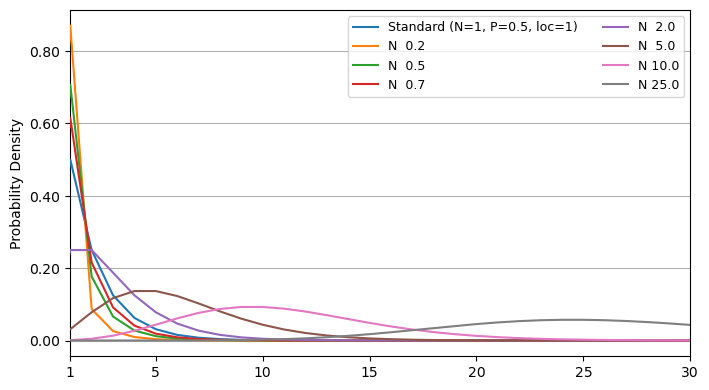

In [11]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixedNB.pmf( bins ), color=TabColorsKeys[cCnt], label="Standard (N=1, P=0.5, loc=1)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(NExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenN[cCnt-1].pmf( bins ), color=TabColorsKeys[cCnt],
                         label="N %4.1f" % NExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [12]:
( StanFixedNB.cdf( 60 ), ListOFrozenN[0].cdf( 60 ), ListOFrozenN[1].cdf( 60 ), ListOFrozenN[2].cdf( 60 ), ListOFrozenN[3].cdf( 60 ), 
  ListOFrozenN[4].cdf( 60 ), ListOFrozenN[5].cdf( 60 ), ListOFrozenN[6].cdf( 60 ), )

(1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999999999999631,
 0.9999999998877775,
 0.9999464261582076)

In [13]:
( StanFixedNB.cdf( 14 ), ListOFrozenN[0].cdf( 14 ), ListOFrozenN[1].cdf( 14 ), ListOFrozenN[2].cdf( 14 ), ListOFrozenN[3].cdf( 14 ), 
  ListOFrozenN[4].cdf( 14 ), ListOFrozenN[5].cdf( 14 ), ListOFrozenN[6].cdf( 14 ), )

(0.99993896484375,
 0.999997347369647,
 0.9999874949782526,
 0.9999744506843862,
 0.99951171875,
 0.98455810546875,
 0.7975635528564453,
 0.036475694258115254)

In [14]:
( StanFixedNB.cdf( 2 ), ListOFrozenN[0].cdf( 2 ), ListOFrozenN[1].cdf( 2 ), ListOFrozenN[2].cdf( 2 ), ListOFrozenN[3].cdf( 2 ), 
  ListOFrozenN[4].cdf( 2 ), ListOFrozenN[5].cdf( 2 ), ListOFrozenN[6].cdf( 2 ), )

(0.75,
 0.9576056196257364,
 0.8838834764831843,
 0.831022479007819,
 0.5,
 0.109375,
 0.005859375,
 4.023313522338867e-07)

## P, probability of a single success

In [15]:
PExamines = [ 0.01, 0.15, 0.35, 0.65, 0.85, 0.99 ]

In [16]:
ListOFrozenP = list()

In [17]:
for P in PExamines:
    ListOFrozenP.append( sstats.nbinom( Stan_N, P, loc=Stan_Loc ) )
# end for

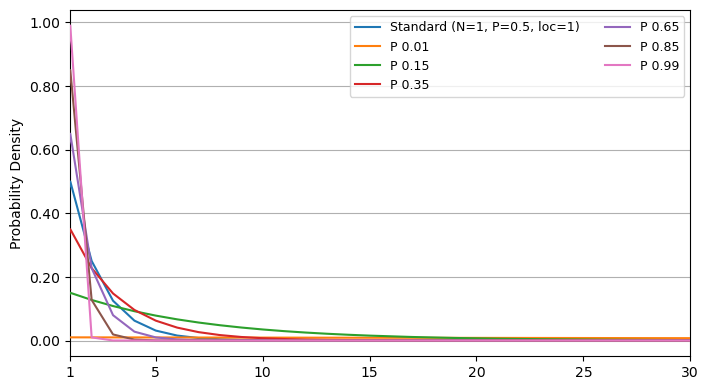

In [18]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixedNB.pmf( bins ), color=TabColorsKeys[cCnt], label="Standard (N=1, P=0.5, loc=1)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(PExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenP[cCnt-1].pmf( bins ), color=TabColorsKeys[cCnt],
                         label="P %4.2f" % PExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [19]:
( StanFixedNB.cdf( 90 ), ListOFrozenP[0].cdf( 90 ), ListOFrozenP[1].cdf( 90 ), ListOFrozenP[2].cdf( 90 ), ListOFrozenP[3].cdf( 90 ), 
  ListOFrozenP[4].cdf( 90 ), ListOFrozenP[5].cdf( 90 ), )

(1.0, 0.5952680273216759, 0.9999995556723761, 1.0, 1.0, 1.0, 1.0)

In [20]:
( StanFixedNB.cdf( 14 ), ListOFrozenP[0].cdf( 14 ), ListOFrozenP[1].cdf( 14 ), ListOFrozenP[2].cdf( 14 ), ListOFrozenP[3].cdf( 14 ), 
  ListOFrozenP[4].cdf( 14 ), ListOFrozenP[5].cdf( 14 ), )

(0.99993896484375,
 0.1312541872310217,
 0.8972303304691156,
 0.9975968161708378,
 0.9999995860454878,
 0.9999999999970807,
 1.0)

In [21]:
( StanFixedNB.cdf( 2 ), ListOFrozenP[0].cdf( 2 ), ListOFrozenP[1].cdf( 2 ), ListOFrozenP[2].cdf( 2 ), ListOFrozenP[3].cdf( 2 ), 
  ListOFrozenP[4].cdf( 2 ), ListOFrozenP[5].cdf( 2 ), )

(0.75, 0.0199, 0.2775, 0.5774999999999999, 0.8775000000000001, 0.9775, 0.9999)

## Location

In [22]:
LocExamines = [ 2, 3, 4, 5, 10 ]

In [23]:
ListOFrozenLocs = list()

In [24]:
for location in LocExamines:
    ListOFrozenLocs.append( sstats.nbinom( Stan_N, Stan_P, loc=location ) )
# end for

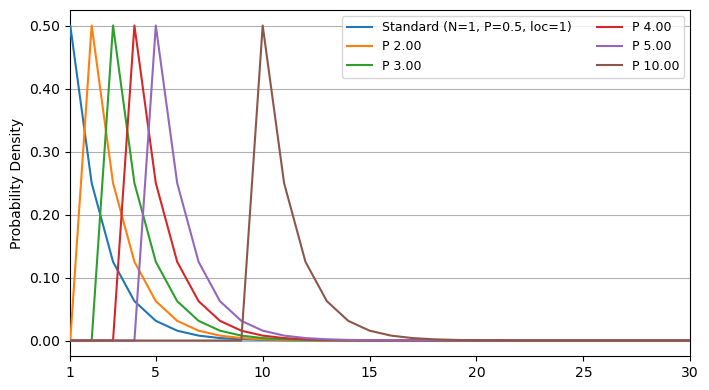

In [25]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
cCnt = 0
startZ = 20
newZ = startZ
stanpmf, = ax11.plot( bins, StanFixedNB.pmf( bins ), color=TabColorsKeys[cCnt], label="Standard (N=1, P=0.5, loc=1)",
                      linewidth=1.5, linestyle='-', zorder=startZ, )
for cCnt in range(1, len(LocExamines)+1):
    newZ +- cCnt
    nxtpmf, = ax11.plot( bins, ListOFrozenLocs[cCnt-1].pmf( bins ), color=TabColorsKeys[cCnt],
                         label="P %4.2f" % LocExamines[cCnt-1], linewidth=1.5, linestyle='-', 
                         zorder=newZ )
# end for
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [26]:
( StanFixedNB.cdf( 90 ), ListOFrozenLocs[0].cdf( 90 ), ListOFrozenLocs[1].cdf( 90 ), ListOFrozenLocs[2].cdf( 90 ), ListOFrozenLocs[3].cdf( 90 ), 
  ListOFrozenLocs[4].cdf( 90 ), )

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [27]:
( StanFixedNB.cdf( 14 ), ListOFrozenLocs[0].cdf( 14 ), ListOFrozenLocs[1].cdf( 14 ), ListOFrozenLocs[2].cdf( 14 ), ListOFrozenLocs[3].cdf( 14 ), 
  ListOFrozenLocs[4].cdf( 14 ), )

(0.99993896484375,
 0.9998779296875,
 0.999755859375,
 0.99951171875,
 0.9990234375,
 0.96875)

In [28]:
( StanFixedNB.cdf( 2 ), ListOFrozenLocs[0].cdf( 2 ), ListOFrozenLocs[1].cdf( 2 ), ListOFrozenLocs[2].cdf( 2 ), ListOFrozenLocs[3].cdf( 2 ), 
  ListOFrozenLocs[4].cdf( 2 ), )

(0.75, 0.5, 0.0, 0.0, 0.0, 0.0)

## Target Dry Spell Parameter Ranges

Find the target dry spell parameter ranges. For dry spells want, possibility of really long dry spells like 90 to 120 days. Also want to shift the location to 2-4 and don't want the focus of likelihood to be on the location.

In [29]:
DryN_Min = 3.0
DryN_Max = 6.0
Dry_Loc = int( 2.0 )
DryP_Min = 0.15
DryP_Max = 0.50

In [30]:
DryMinMinFroz = sstats.nbinom( DryN_Min, DryP_Min, loc=Dry_Loc )
DryMaxMinFroz = sstats.nbinom( DryN_Max, DryP_Min, loc=Dry_Loc )
DryMinMaxFroz = sstats.nbinom( DryN_Min, DryP_Max, loc=Dry_Loc )
DryMaxMaxFroz = sstats.nbinom( DryN_Max, DryP_Max, loc=Dry_Loc )

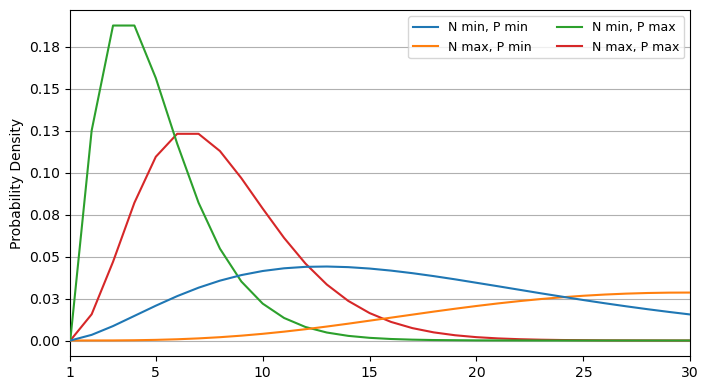

In [31]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
mnmn, = ax11.plot( bins, DryMinMinFroz.pmf( bins ), color=TabColorsKeys[0], label="N min, P min",
                      linewidth=1.5, linestyle='-', zorder=20 )
mxmn, = ax11.plot( bins, DryMaxMinFroz.pmf( bins ), color=TabColorsKeys[1], label="N max, P min",
                      linewidth=1.5, linestyle='-', zorder=18 )
mnmx, = ax11.plot( bins, DryMinMaxFroz.pmf( bins ), color=TabColorsKeys[2], label="N min, P max",
                      linewidth=1.5, linestyle='-', zorder=16 )
mxmx, = ax11.plot( bins, DryMaxMaxFroz.pmf( bins ), color=TabColorsKeys[3], label="N max, P max",
                      linewidth=1.5, linestyle='-', zorder=14 )
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [32]:
DryMinMinFroz.cdf( 120 ), DryMaxMinFroz.cdf(120), DryMinMaxFroz.cdf(120), DryMaxMaxFroz.cdf(120)

(0.9999992839940803, 0.9999122206851839, 1.0, 1.0)

In [33]:
DryMinMinFroz.cdf( 90 ), DryMaxMinFroz.cdf( 90), DryMinMaxFroz.cdf(90), DryMaxMaxFroz.cdf(90)

(0.9999453934418602, 0.9969286063936028, 1.0, 1.0)

In [34]:
DryMinMinFroz.cdf( 14 ), DryMaxMinFroz.cdf(14), DryMinMaxFroz.cdf(14), DryMaxMaxFroz.cdf(14)

(0.3957747959051827,
 0.041896355655733034,
 0.996307373046875,
 0.951873779296875)

In [35]:
DryMinMinFroz.cdf( 5 ), DryMaxMinFroz.cdf(5), DryMinMaxFroz.cdf(5), DryMaxMaxFroz.cdf(5)

(0.047338593750000005, 0.0006340420546874999, 0.65625, 0.25390625)

In [36]:
DryMinMinFroz.stats( moments='mvsk' )

(array(19.), array(113.33333333), array(1.15851494), array(2.00882353))

In [37]:
DryMaxMinFroz.stats( moments='mvsk' )

(array(36.), array(226.66666667), array(0.81919377), array(1.00441176))

In [38]:
DryMinMaxFroz.stats( moments='mvsk' )

(array(5.), array(6.), array(1.22474487), array(2.16666667))

In [39]:
DryMaxMaxFroz.stats( moments='mvsk' )

(array(8.), array(12.), array(0.8660254), array(1.08333333))

In [40]:
np.median( DryMinMinFroz.rvs( 1000 ) ), np.median( DryMaxMinFroz.rvs(1000) ), np.median( DryMinMaxFroz.rvs(1000) ), np.median( DryMaxMaxFroz.rvs(1000) )

(17.0, 35.0, 4.0, 7.0)

## Target Wet Spell Parameter Ranges

Find the target wet spell parameter ranges. For wet spells want, short wells spells with limited possibility beyond 14 days.

In [89]:
WetN_Min = 1.0
WetN_Max = 4.0
Wet_Loc = int( 1.0 )
WetP_Min = 0.30
WetP_Max = 0.70

In [90]:
WetMinMinFroz = sstats.nbinom( WetN_Min, WetP_Min, loc=Wet_Loc )
WetMaxMinFroz = sstats.nbinom( WetN_Max, WetP_Min, loc=Wet_Loc )
WetMinMaxFroz = sstats.nbinom( WetN_Min, WetP_Max, loc=Wet_Loc )
WetMaxMaxFroz = sstats.nbinom( WetN_Max, WetP_Max, loc=Wet_Loc )

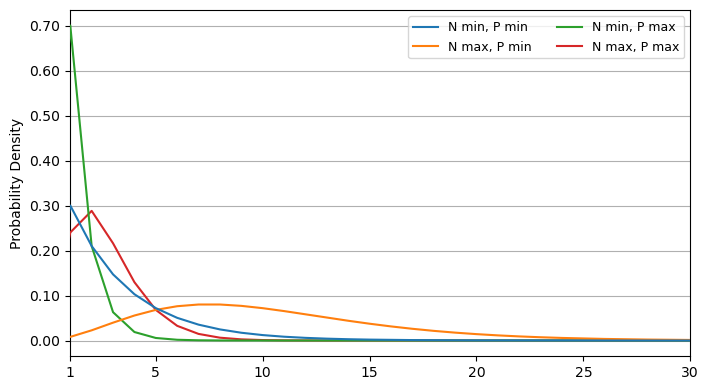

In [91]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 4.5)
ax11 = Fig1.add_subplot(111)
mnmn, = ax11.plot( bins, WetMinMinFroz.pmf( bins ), color=TabColorsKeys[0], label="N min, P min",
                      linewidth=1.5, linestyle='-', zorder=20 )
mxmn, = ax11.plot( bins, WetMaxMinFroz.pmf( bins ), color=TabColorsKeys[1], label="N max, P min",
                      linewidth=1.5, linestyle='-', zorder=18 )
mnmx, = ax11.plot( bins, WetMinMaxFroz.pmf( bins ), color=TabColorsKeys[2], label="N min, P max",
                      linewidth=1.5, linestyle='-', zorder=16 )
mxmx, = ax11.plot( bins, WetMaxMaxFroz.pmf( bins ), color=TabColorsKeys[3], label="N max, P max",
                      linewidth=1.5, linestyle='-', zorder=14 )
ax11.set_xticks( xPTicks )
#ax11.set_yticks( yPTicks )
ax11.set_ylabel('Probability Density', fontsize=10)
#ax11.set_ylim( (yPTicks[0], yPTicks[len(yPTicks)-1]) )
ax11.set_xlim( (xPTicks[0], xPTicks[len(xPTicks)-1]) )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.2f}" ) )
ax11.legend( loc='upper right', fontsize=9, ncol=2 )
ax11.grid(visible=True, which='major', axis='y' )

In [92]:
WetMinMinFroz.cdf( 14 ), WetMaxMinFroz.cdf(14), WetMinMaxFroz.cdf(14), WetMaxMaxFroz.cdf(14)

(0.99321776927151, 0.7980929912128529, 0.99999995217031, 0.9999878354749423)

In [93]:
WetMinMinFroz.cdf( 5 ), WetMaxMinFroz.cdf(5), WetMinMaxFroz.cdf(5), WetMaxMaxFroz.cdf(5)

(0.8319300000000001, 0.19410434999999993, 0.99757, 0.94203235)

In [94]:
WetMinMinFroz.cdf( 2 ), WetMaxMinFroz.cdf( 2 ), WetMinMaxFroz.cdf(2), WetMaxMaxFroz.cdf(2)

(0.51, 0.030779999999999995, 0.9099999999999999, 0.5282199999999999)

In [95]:
WetMinMinFroz.cdf( 1 ), WetMaxMinFroz.cdf(1), WetMinMaxFroz.cdf(1), WetMaxMaxFroz.cdf(1)

(0.3, 0.0081, 0.7, 0.24009999999999992)

In [96]:
WetMinMinFroz.stats( moments='mvsk' )

(array(3.33333333), array(7.77777778), array(2.03188864), array(6.12857143))

In [97]:
WetMaxMinFroz.stats( moments='mvsk' )

(array(10.33333333), array(31.11111111), array(1.01594432), array(1.53214286))

In [98]:
WetMinMaxFroz.stats( moments='mvsk' )

(array(1.42857143), array(0.6122449), array(2.37346442), array(7.63333333))

In [99]:
WetMaxMaxFroz.stats( moments='mvsk' )

(array(2.71428571), array(2.44897959), array(1.18673221), array(1.90833333))

In [100]:
np.median( WetMinMinFroz.rvs( 1000 ) ), np.median( WetMaxMinFroz.rvs(1000) ), np.median( WetMinMaxFroz.rvs(1000) ), np.median( WetMaxMaxFroz.rvs(1000) )

(3.0, 9.0, 1.0, 2.0)